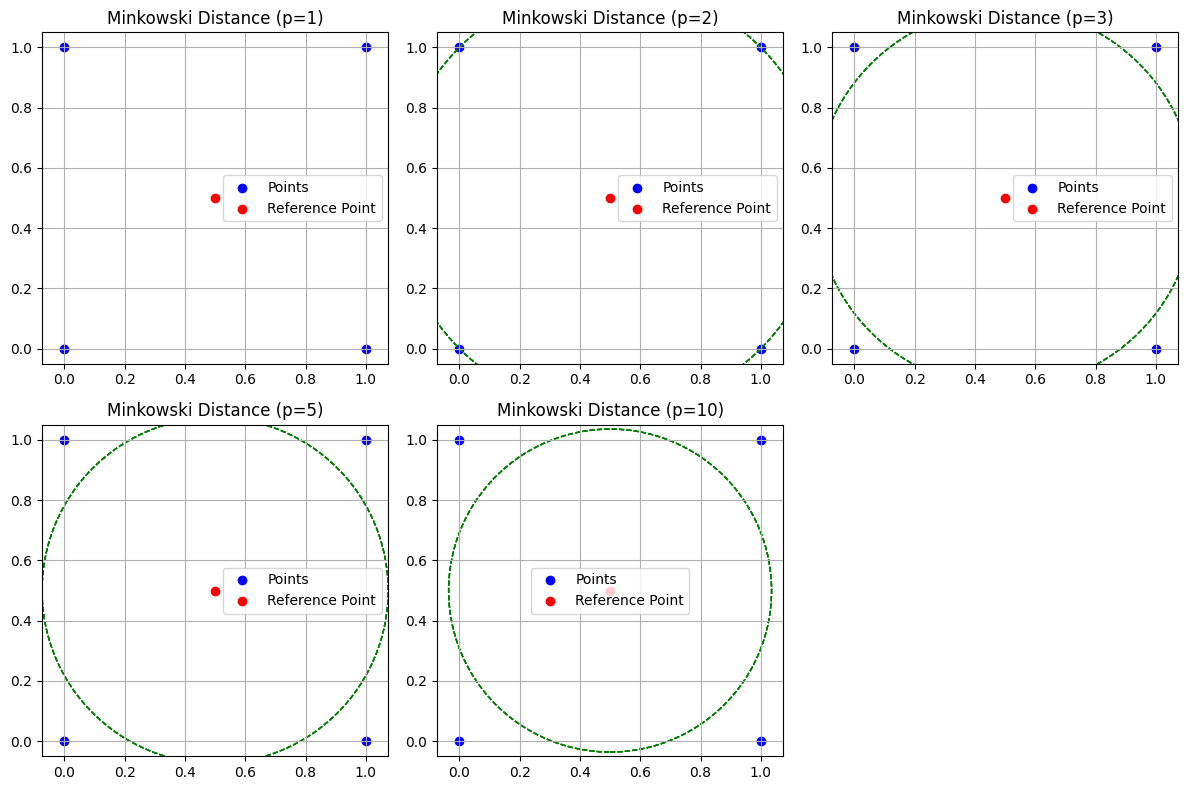

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Implementation of the Minkowski Eigenfunction (Vectorized)
def minkowski_distance(x, y, p):
    return np.sum(np.abs(x - y) ** p, axis=1) ** (1 / p)

# Generating points in a square formation
points = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Reference point for measuring distances
reference_point = np.array([0.5, 0.5])

# p-values to test
p_values = [1, 2, 3, 5, 10]

plt.figure(figsize=(12, 8))

for i, p in enumerate(p_values, 1):
    # Calculating the proper Minkowski distance
    distances_custom = minkowski_distance(points, reference_point, p)

   # Calculation using Scikit-Learn
    distances_sklearn = pairwise_distances(points, [reference_point], metric='minkowski', p=p).flatten()

    # Check for a match
    assert np.allclose(distances_custom, distances_sklearn), f"Mismatch for p={p}"

    # Visualization of points and distances
    plt.subplot(2, 3, i)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Points')
    plt.scatter(reference_point[0], reference_point[1], c='red', label='Reference Point')

    # Draw distance circles
    for dist in distances_custom:
        circle = plt.Circle(reference_point, dist, color='green', fill=False, linestyle='--')
        plt.gca().add_artist(circle)

    plt.title(f'Minkowski Distance (p={p})')
    plt.legend()
    plt.axis('equal')
    plt.grid(True)

plt.tight_layout()
plt.show()
